In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

In [7]:
print(train_images.shape)
print(test_images.shape)
print(train_labels.shape)
print(test_labels.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [50]:
len(train_labels)

60000

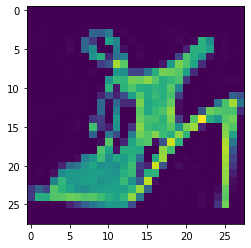

In [25]:
plt.imshow(train_images[345])
plt.show()

# 1. EDA

In [26]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

#### Labels

Each training and test example is assigned to one of the following labels:

- 0 T-shirt/top
- 1 Trouser
- 2 Pullover
- 3 Dress
- 4 Coat
- 5 Sandal
- 6 Shirt
- 7 Sneaker
- 8 Bag
- 9 Ankle boot

In [27]:
train_images = train_images / 255.0
test_images = test_images / 255.0

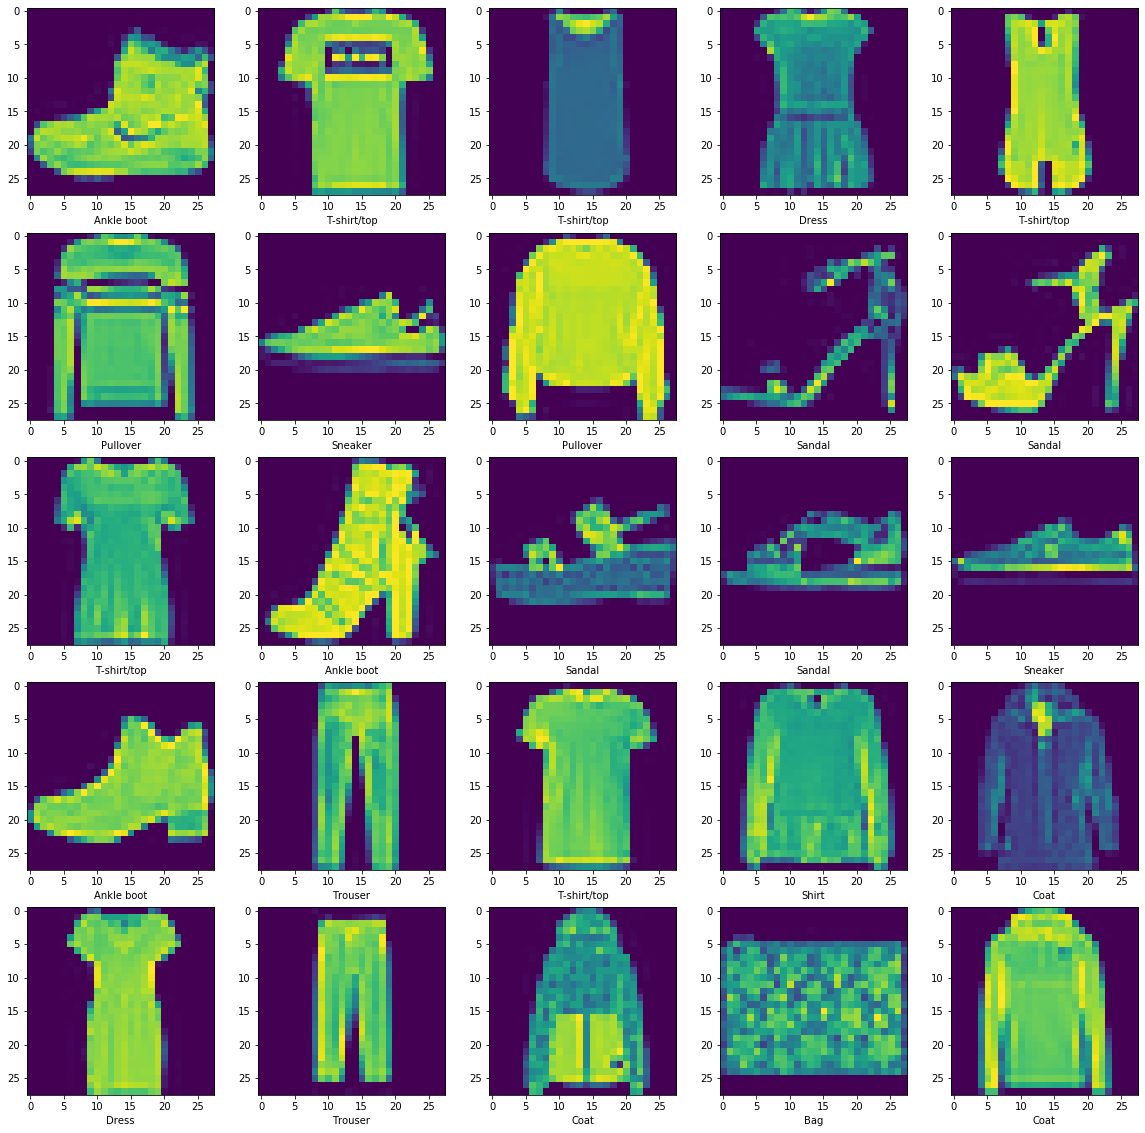

In [29]:
label = [ 'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]
plt.figure(figsize=(20,20)) 
for i in range(25) :
    plt.subplot(5,5, i+1)
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(label[train_labels[i]])
plt.show()

# 모델 만들기

In [39]:
def set_model() :
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)), #1차원으로 다시 만들어 준다.
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(54, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
    return model

In [40]:
model = set_model()
model.fit(train_images, train_labels, epochs=20)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 56us/sample - loss: 0.5197 - accuracy: 0.8169
Epoch 2/20
60000/60000 [==============================] - 3s 50us/sample - loss: 0.3845 - accuracy: 0.8595
Epoch 3/20
60000/60000 [==============================] - 3s 51us/sample - loss: 0.3453 - accuracy: 0.8731
Epoch 4/20
60000/60000 [==============================] - 3s 50us/sample - loss: 0.3259 - accuracy: 0.8793
Epoch 5/20
60000/60000 [==============================] - 3s 49us/sample - loss: 0.3080 - accuracy: 0.8861
Epoch 6/20
60000/60000 [==============================] - 3s 48us/sample - loss: 0.2954 - accuracy: 0.8915
Epoch 7/20
60000/60000 [==============================] - 3s 49us/sample - loss: 0.2819 - accuracy: 0.8954
Epoch 8/20
60000/60000 [==============================] - 3s 49us/sample - loss: 0.2732 - accuracy: 0.8979
Epoch 9/20
60000/60000 [==============================] - 3s 52us/sample - loss: 0.2640 - accuracy: 0.9020
Epoch 10/20
60

In [43]:
loss, acc = model.evaluate(test_images, test_labels, verbose=2)
print('정확도:{:5.2f}%'.format(acc*100))

10000/1 - 0s - loss: 0.2659 - accuracy: 0.8822
정확도:88.22%


# Inference 예측하기

In [45]:
prediction = model.predict_classes(test_images)
prediction[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=int64)